# 1. Create datasets

Multivariate time series interstate traffic volume data

https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume


<img src="data_pic.png">

In [1]:
from data import *
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
plt.style.use('fivethirtyeight')

df = pipeline()

In [2]:
df

,temp,rain_1h,clouds_all,traffic_volume,weather_SQUALLS,weather_Sky is Clear,weather_broken clouds,weather_drizzle,weather_few clouds,weather_fog,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,40,5545,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 10:00:00,289.36,0.0,75,4516,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 11:00:00,289.58,0.0,90,4767,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 12:00:00,290.13,0.0,90,5026,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2012-10-02 13:00:00,291.14,0.0,75,4918,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,75,3543,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-09-30 20:00:00,282.76,0.0,90,2781,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-09-30 21:00:00,282.73,0.0,90,2159,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
times   = date2num(df.index)
traffic = df.traffic_volume.values
temperature = df.temp.values
days = 7*4

start, end = df.index[-days*24:][[0,-1]] # 後ろからdays分の区間を取り出し、最初と最後のdate_timeを取り出す
(end-start)

Timedelta('27 days 23:00:00')

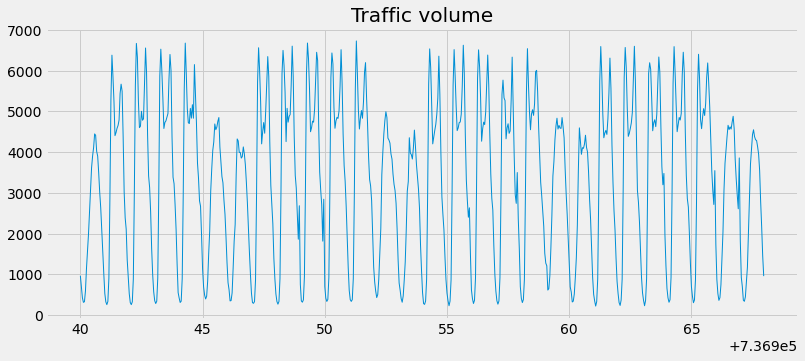

In [4]:
fig = plt.figure(figsize=(12,5))
ax  = fig.add_subplot(1,1,1)
_ = ax.plot(times[-days*24:],
            traffic[-days*24:], lw=1)
_ = ax.set_title('Traffic volume')

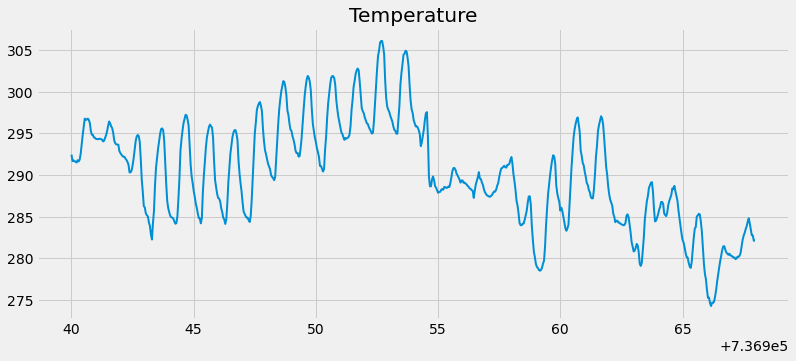

In [5]:
fig = plt.figure(figsize=(12,5))
ax  = fig.add_subplot(1,1,1)
_ = ax.plot(times[-days*24:],
            temperature[-days*24:], lw=2)
_ = ax.set_title('Temperature')

In [6]:
df.index

DatetimeIndex(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
               '2012-10-02 11:00:00', '2012-10-02 12:00:00',
               '2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               ...
               '2018-09-30 14:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=40575, freq=None)

## Training samples

In [7]:
datasets = samples(df, 24)

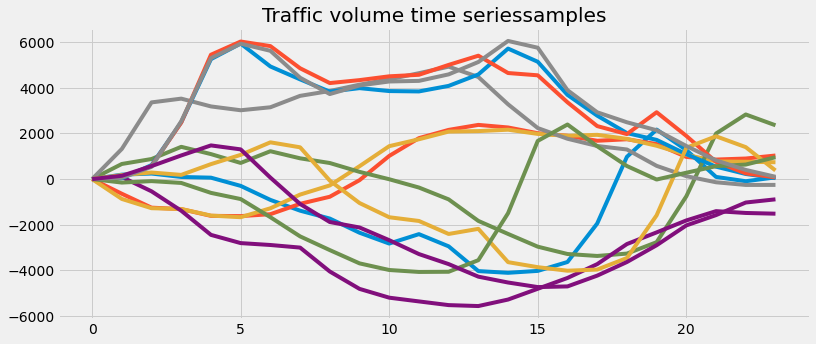

In [10]:
fig = plt.figure(figsize=(12,5))
ax  = fig.add_subplot(1,1,1)
for i in np.random.permutation(len(datasets['train']['X']))[:12]:
    sample = datasets['train']['X'][i].T[3]
    _ = ax.plot(sample - sample[0])
    _ = ax.set_title('Traffic volume time seriessamples')

In [17]:
datasets

{'train': {'X': array([[[293.66,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [290.65,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [288.19,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          ...,
          [298.17,   0.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
          [298.06,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [297.67,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ]],
  
         [[290.65,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [288.19,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [287.1 ,   0.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
          ...,
          [298.06,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [297.67,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [296.36,   0.  ,  40.  , ...,   0.  ,   0.  ,   0.  ]],
  
         [[288.19,   0.  ,  20.  , ...,   0.  ,   0.  ,   0.  ],
          [287.1 ,   0.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
          [286.25,   0.  ,   1.  , ...